In [22]:
import geopandas as gpd
import pandas as pd
import requests
import json
uri = "https://static01.nyt.com/newsgraphics/2020/10/29/election-early-battlegrounds/030056173a56b8c767e453b62d8cee320984b92d/GA.json"
r = requests.get(uri)
data = r.json()['topojson']
#['objects']['counties']['geometries']
#gpd.GeoDataFrame().from_features(data)

In [23]:
data.keys()

dict_keys(['type', 'arcs', 'transform', 'objects'])

In [15]:
data['objects']

{'counties': {'type': 'GeometryCollection',
  'geometries': [{'arcs': [[0, 1, 2, 3, 4, 5]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13001',
     'NAME': 'Appling',
     'STATEFP': '13'}},
   {'arcs': [[6, 7, 8, 9, 10, 11]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13007',
     'NAME': 'Baker',
     'STATEFP': '13'}},
   {'arcs': [[12, 13, 14, 15, 16, 17]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13025',
     'NAME': 'Brantley',
     'STATEFP': '13'}},
   {'arcs': [[18, 19, 20, 21, 22, 23]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13029',
     'NAME': 'Bryan',
     'STATEFP': '13'}},
   {'arcs': [[24, 25, -21]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13051',
     'NAME': 'Chatham',
     'STATEFP': '13'}},
   {'arcs': [[26, 27, 28, 29, 30, 31, 32, 33]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13139',
     'NAME': 'Ha

In [12]:
data['arcs'][0]

[[7578, 4716],
 [55, -32],
 [60, 11],
 [27, -23],
 [-1, -30],
 [118, -20],
 [36, 9],
 [23, -10],
 [17, 25],
 [75, -30],
 [27, -34],
 [56, -23]]

In [7]:
data['type']

'Topology'

In [8]:
data['transform']

{'scale': [0.00041878644659735126, 0.0003410574901465841],
 'translate': [-85.60490116189415, 30.358045508650626]}

In [27]:
data['objects']

{'counties': {'type': 'GeometryCollection',
  'geometries': [{'arcs': [[0, 1, 2, 3, 4, 5]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13001',
     'NAME': 'Appling',
     'STATEFP': '13'}},
   {'arcs': [[6, 7, 8, 9, 10, 11]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13007',
     'NAME': 'Baker',
     'STATEFP': '13'}},
   {'arcs': [[12, 13, 14, 15, 16, 17]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13025',
     'NAME': 'Brantley',
     'STATEFP': '13'}},
   {'arcs': [[18, 19, 20, 21, 22, 23]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13029',
     'NAME': 'Bryan',
     'STATEFP': '13'}},
   {'arcs': [[24, 25, -21]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13051',
     'NAME': 'Chatham',
     'STATEFP': '13'}},
   {'arcs': [[26, 27, 28, 29, 30, 31, 32, 33]],
    'type': 'Polygon',
    'properties': {'ST': 'GA',
     'GEOID': '13139',
     'NAME': 'Ha

In [28]:
topo = dict(data)

# write topojson section to file
with open('topo.json', 'w') as f:
    json.dump(topo, f)

# read as GeoDataFrame
gdf = gpd.GeoDataFrame.from_file('topo.json')
#gdf.rename(columns={'NAME': 'county'}, inplace=True)

# add other attributes to gdf
#gdf = gdf.merge(vote_df, on='county')
print(gdf)

       id  ST  GEOID        NAME STATEFP  \
0    None  GA  13001     Appling      13   
1    None  GA  13007       Baker      13   
2    None  GA  13025    Brantley      13   
3    None  GA  13029       Bryan      13   
4    None  GA  13051     Chatham      13   
..    ...  ..    ...         ...     ...   
154  None  GA  13125    Glascock      13   
155  None  GA  13187     Lumpkin      13   
156  None  GA  13223    Paulding      13   
157  None  GA  13045     Carroll      13   
158  None  GA  13161  Jeff Davis      13   

                                              geometry  
0    POLYGON ((-82.43134 31.96647, -82.40830 31.955...  
1    POLYGON ((-84.63750 31.43408, -84.53490 31.431...  
2    POLYGON ((-82.28476 31.22433, -82.26969 31.219...  
3    POLYGON ((-81.78096 32.15303, -81.62475 32.189...  
4    POLYGON ((-81.39149 32.09607, -81.19508 32.237...  
..                                                 ...  
154  POLYGON ((-82.43176 33.27477, -82.47070 33.250...  
155  POLYGON ((

<AxesSubplot:>

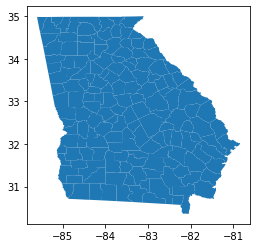

In [25]:
gdf.plot()